Predict CLTV of a customer

Can you help the company identify the most potential customers?



Problem Statement


VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.



In [702]:
#Importing libraries and ignore warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read csv files

In [703]:
#Read CSV(comma separated file),(train and test)
df_train=pd.read_csv("train_BRCpofr.csv")
df_test=pd.read_csv("test_koRSKBP.csv")

In [704]:
#Print first 5 rows of train data set,by head function.
df_train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [705]:
#Print first 5 rows of test data set,by head function.
df_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [706]:
#shape of train and test data
df_train.shape , df_test.shape

((89392, 12), (59595, 11))

In [707]:
#sample for randomly selected rows
df_train.sample(5)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
64048,64049,Male,Urban,High School,2L-5L,1,6,5930,More than 1,A,Platinum,92952
48084,48085,Male,Rural,High School,5L-10L,1,5,0,1,B,Platinum,29808
11852,11853,Female,Urban,Bachelor,5L-10L,0,8,2933,More than 1,A,Silver,412896
3102,3103,Male,Urban,High School,5L-10L,0,8,6853,More than 1,A,Platinum,58740
84748,84749,Male,Rural,High School,5L-10L,1,7,2416,1,B,Silver,46368


In [708]:
#Check duplicates
duplicate=df_train[df_train.duplicated()]
duplicate

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [709]:
#Null values in train dataset
df_train.isnull().sum().sum()

0

In [710]:
#null values in test dataset
df_test.isnull().sum().sum()

0

In [711]:
#data types of features (call .info() function)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [712]:
#Check th unique in the claim amount of train dataset.
df_train['claim_amount'].unique()

array([ 5790,  5080,  2599, ..., 15361, 12911, 17143], dtype=int64)

In [713]:
#Check the no of times distinct values repeat in claim amount column of train dataset.
df_train['claim_amount'].value_counts(ascending=True)

17143        1
17735        1
15044        1
9906         1
8894         1
         ...  
3834        32
3833        32
3912        33
4006        38
0        17671
Name: claim_amount, Length: 10889, dtype: int64

In [714]:
#Check the qualification by calling unique function,Here others cannot specify lower or higher,
#so we cannot categories qualifiaction as ordinal variable.
df_train['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

# Scatterplot

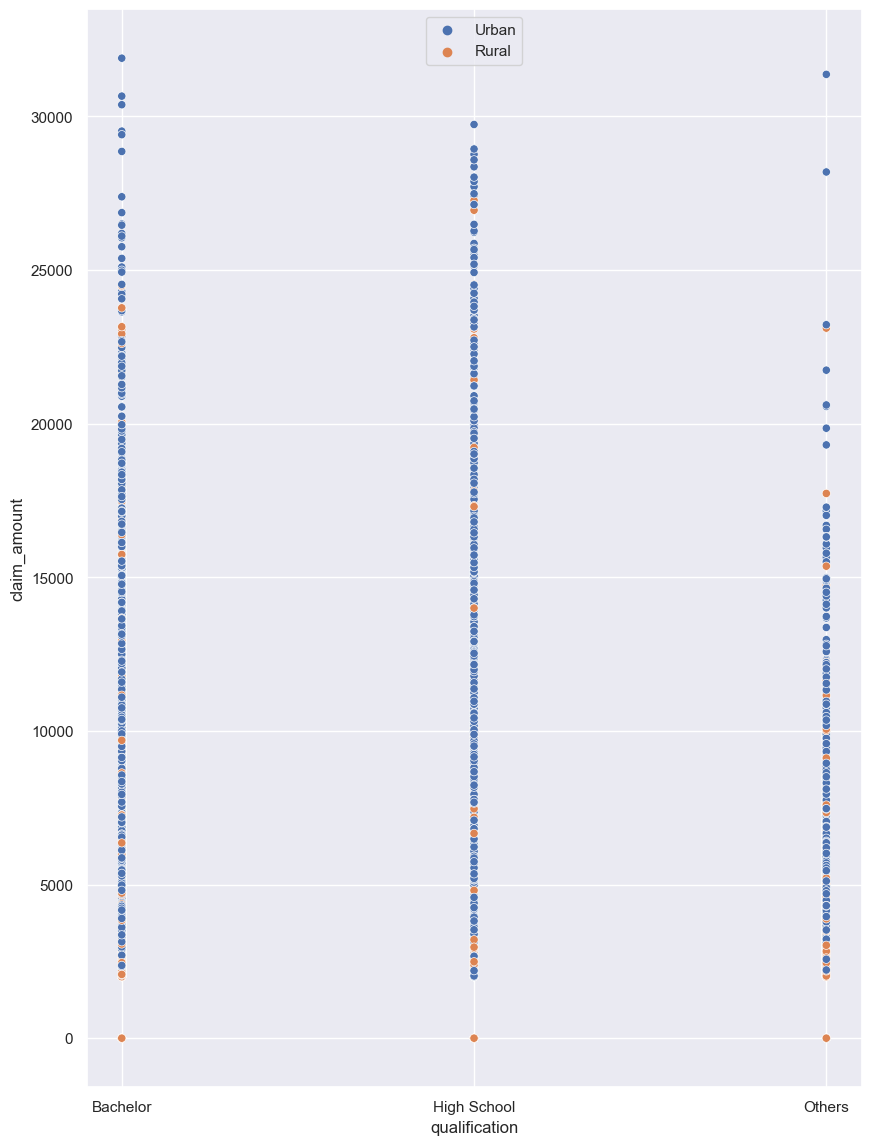

In [715]:
#Check the qualification with respect to claim amount and set hue as area on scatter plot for better understanding of data.
plt.figure(figsize=(10,14))
sns.scatterplot('qualification','claim_amount',hue='area',data=df_train)
plt.legend(loc=9)
plt.show()

# Boxplot and distplot(claim_amount)

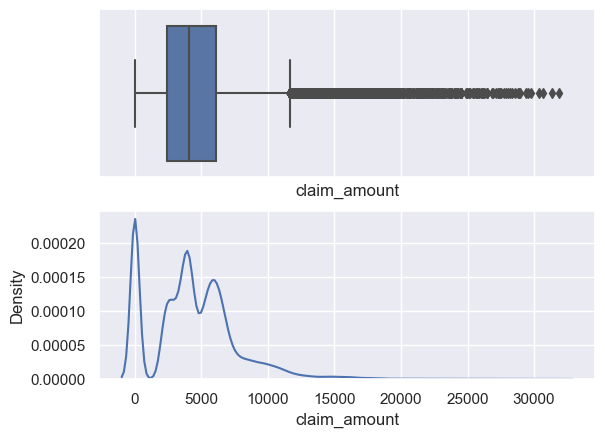

In [716]:
#Check the outliers in the claim amount, as we have seen that there are lot of outiers in the data.
sns.set(style="darkgrid")
fig,(ax_box,ax_dist)=plt.subplots(2,sharex=True)
sns.boxplot('claim_amount',data=df_train,ax=ax_box)
sns.distplot(df_train['claim_amount'],hist=False,ax=ax_dist)
plt.show()

# boxplot and distplot(vintage)

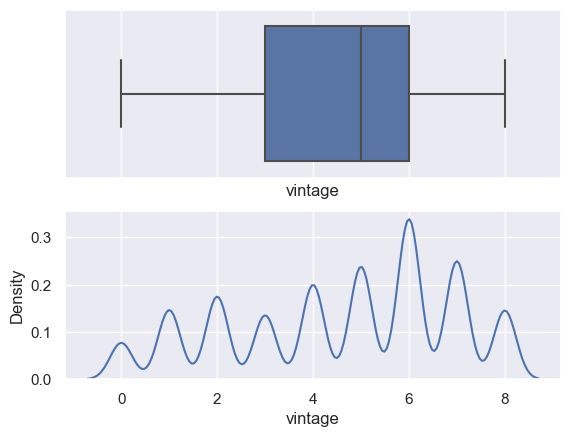

In [717]:
#Check the outliers in the vintage column, there is no outlier in the vintage column.
sns.set(style="darkgrid")
fig,(ax_box,ax_dist)=plt.subplots(2,sharex=True)
sns.boxplot('vintage',data=df_train,ax=ax_box)
sns.distplot(df_train['vintage'],hist=False,ax=ax_dist)
plt.show()

# barplot

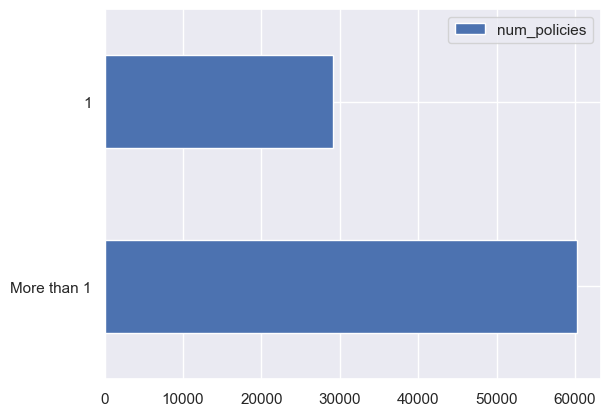

In [718]:
#No of policies people hold is more than 1.
df_train['num_policies'].value_counts().plot.barh()
plt.legend(['num_policies'])
plt.show()

# scatterplot

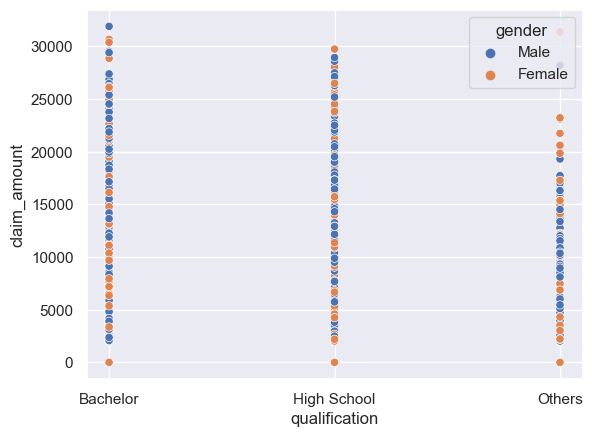

In [719]:
#Here we seen that qualification v/s claim amount by set hue=gender, No.of males is higher than no.of females in all the three categories.
sns.scatterplot('qualification','claim_amount',hue='gender',data=df_train)
plt.show()

# Barplot

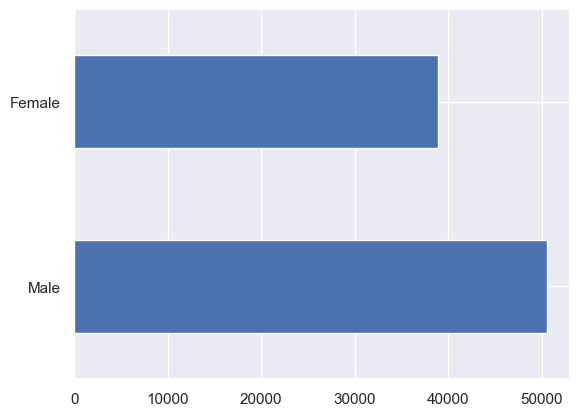

In [720]:
#Horizontal bar plot between Male and female in the data.
df_train['gender'].value_counts().plot.barh()
plt.show()

# Countplot

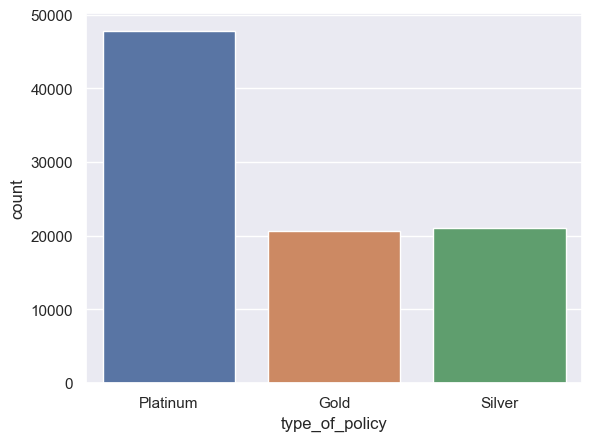

In [721]:
#We have clearly seen that people holding platinum policy ,rather than rest of 2(gold and silver)
sns.countplot('type_of_policy',data=df_train)
plt.show()

In [722]:
#By calling describe function, we can see that how data is distributed.
df_train['claim_amount'].describe()

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

# Outlier removal through quartile method and applying capping methodology

In [723]:
#Q1 and Q3 percentile.
percentile25=df_train['claim_amount'].quantile(0.25)
percentile75=df_train['claim_amount'].quantile(0.75)

In [724]:
#Inter Quartile Range(IQR)
IQR=percentile75-percentile25

In [725]:
IQR

3688.0

In [726]:
#Find upper and lower limit.
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR

In [727]:
#Print upper and lower limit
print("Upper_limit:",upper_limit)
print("Lower_limit:",lower_limit)

Upper_limit: 11626.0
Lower_limit: -3126.0


In [728]:
#Here we extrat those rows whose claim amount is greater than upper limit.
df_train[df_train['claim_amount']>upper_limit]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
47,48,Female,Urban,Bachelor,2L-5L,1,6,16123,More than 1,A,Platinum,72168
101,102,Male,Urban,Bachelor,5L-10L,0,6,15703,More than 1,B,Platinum,63648
142,143,Male,Urban,High School,5L-10L,0,6,13304,More than 1,A,Platinum,360924
168,169,Male,Urban,Bachelor,2L-5L,0,4,12260,More than 1,A,Gold,131616
193,194,Male,Urban,High School,5L-10L,0,5,15311,1,A,Platinum,34980
...,...,...,...,...,...,...,...,...,...,...,...,...
89297,89298,Female,Urban,High School,More than 10L,0,2,12925,More than 1,A,Gold,60384
89342,89343,Male,Urban,High School,More than 10L,1,1,12159,More than 1,A,Platinum,55608
89353,89354,Female,Rural,Others,5L-10L,0,3,15361,More than 1,A,Platinum,66432
89357,89358,Male,Urban,High School,5L-10L,0,6,12911,More than 1,A,Silver,88908


In [729]:
#There is no outlier in the leftside of claim amount , data is positively skewed.
df_train[df_train['claim_amount']<lower_limit]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [730]:
#Make a copy of df_train and store it into a variable named called df_train_cap
df_train_cap=df_train.copy()

In [731]:
#Remove the outlier by using np.where method and capping the outlier.
#np.where(Condition to be apply,If condition=true replace it , otherwise return the original dataframe.)
df_train_cap['claim_amount']=np.where(df_train_cap['claim_amount']>upper_limit,upper_limit,df_train_cap['claim_amount'])

In [732]:
#Check the shape of the dataframe(shape=(no of rows ,no of columns))
df_train_cap.shape

(89392, 12)

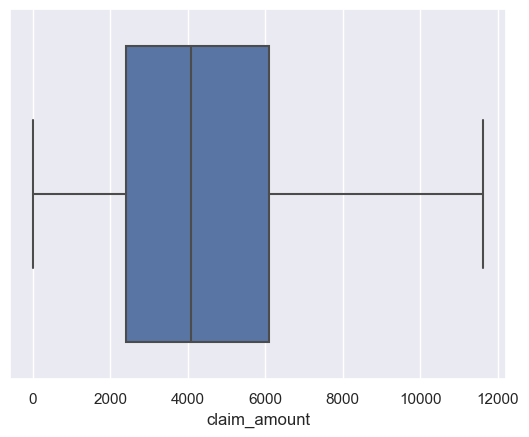

In [733]:
#Check outlier is removed or not by plot the boxplot and we have clearly seen that outlier has been removed.
sns.boxplot(df_train_cap['claim_amount'])
plt.show()

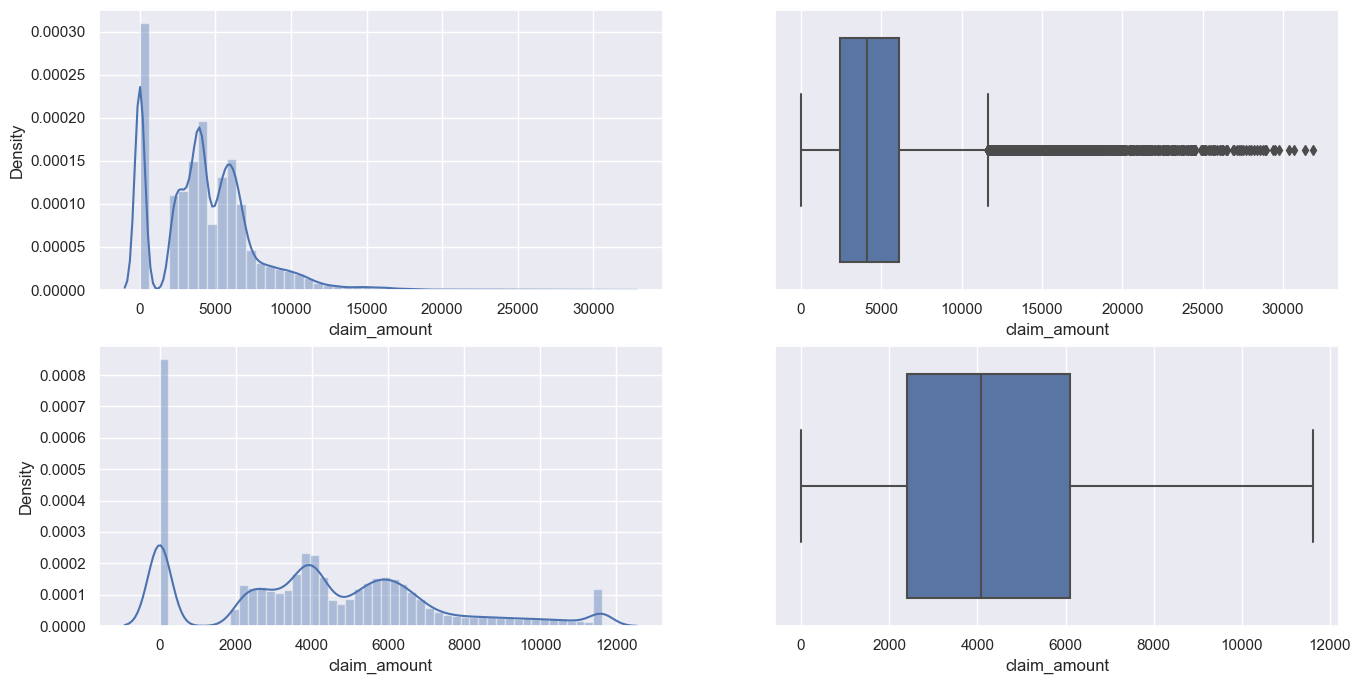

In [734]:
#Here we check the visualization before and after the removal of outlier from claim amount column and
#plot them side by side by subplot function.,for better visualization of data.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_train['claim_amount'])

plt.subplot(2,2,2)
sns.boxplot(df_train['claim_amount'])

plt.subplot(2,2,3)
sns.distplot(df_train_cap['claim_amount'])

plt.subplot(2,2,4)
sns.boxplot(df_train_cap['claim_amount'])

plt.show()

In [735]:
#Here we found correlation between the features.
cor=df_train_cap.corr()
cor

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003257,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.115352,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.008562,0.020608
claim_amount,0.003257,-0.115352,0.008562,1.000000,0.186592
cltv,-0.004223,-0.077744,0.020608,0.186592,1.000000


# Heatmap

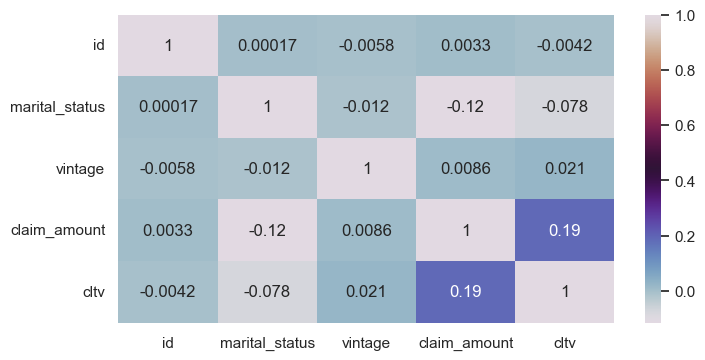

In [736]:
#Here we draw heatmap,For better visulaization of correlation between features.,and claim amount has slightly positive correlation with cltv(target variable)
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap="twilight")
plt.show()

# Drop column(id)

In [737]:
#Here drop the id columns from df_train_cap, as id have not use in prediction the target variable and inplace=True,
#so that it could drop from actual dataframe.
df_train_cap.drop(columns=['id'],inplace=True)

In [738]:
#Show how df looks after drop the id features , call head function.
df_train_cap.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790.0,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080.0,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599.0,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0.0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508.0,More than 1,A,Gold,59736


# Replace the income existing feature from new features

In [739]:
#Check the how many unique type of variables present in the income columns.
df_train_cap['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [740]:
#Here we replace the unique variable  of income feature from ordinal categories, so that we can easily apply ordinal encoding here.

In [741]:
#Here we replace the (<=2L) from the low income,
df_train_cap['income'] = df_train_cap['income'].replace('<=2L', 'low')

In [742]:
df_train_cap['income'] = df_train_cap['income'].replace('2L-5L', 'Medium')

In [743]:
df_train_cap['income'] = df_train_cap['income'].replace('5L-10L', 'High')

In [744]:
df_train_cap['income'] = df_train_cap['income'].replace('More than 10L', 'Very High')

In [745]:
#After replace,how data look ,called sample function for randomly visualize of rows.
df_train_cap.sample(10)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
65067,Male,Urban,Bachelor,High,1,7,6719.0,More than 1,A,Gold,63264
10117,Female,Urban,Bachelor,Medium,0,3,11626.0,1,B,Gold,102684
84478,Female,Urban,Bachelor,High,1,4,2129.0,1,A,Gold,31668
7906,Female,Urban,High School,Medium,0,2,3731.0,More than 1,A,Platinum,56520
62191,Female,Urban,High School,Very High,1,1,3918.0,More than 1,A,Silver,69336
17916,Female,Rural,High School,Very High,1,7,0.0,More than 1,B,Platinum,69864
74030,Female,Urban,High School,Very High,0,5,5601.0,1,A,Platinum,96876
28071,Female,Urban,High School,low,1,6,7011.0,1,C,Gold,60852
41936,Female,Urban,High School,High,1,6,0.0,More than 1,B,Silver,476160
61173,Male,Urban,High School,Medium,1,6,7406.0,1,C,Platinum,70560


In [746]:
#Replace the column name from income to income_slab for better understanding of features.
df_train_cap.rename(columns={'income':'income_slab'},inplace=True)

In [747]:
#call head function
df_train_cap.head()

,gender,area,qualification,income_slab,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,High,1,5,5790.0,More than 1,A,Platinum,64308
1,Male,Rural,High School,High,0,8,5080.0,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,High,1,8,2599.0,More than 1,A,Platinum,64212
3,Female,Rural,High School,High,0,7,0.0,More than 1,A,Platinum,97920
4,Male,Urban,High School,Very High,1,6,3508.0,More than 1,A,Gold,59736


# One hot encoding or pd.get_dummies.

In [748]:
#Here we perform dummies function on nominal categorical variable and drop_first=True,to avoid multicollinearity.
df_train_cap=pd.get_dummies(df_train_cap,columns=['num_policies','policy','gender','qualification','area'],drop_first=True)

In [749]:
#call head function
df_train_cap.head(1)

,income_slab,marital_status,vintage,claim_amount,type_of_policy,cltv,num_policies_More than 1,policy_B,policy_C,gender_Male,qualification_High School,qualification_Others,area_Urban
0,High,1,5,5790.0,Platinum,64308,1,0,0,1,0,0,1


# Ordinal encoding

In [750]:
#Ordinal encoding-as income slab and type of policy are ordinal categorical variables we can easily apply ordinal encoding here.

In [751]:
#import Ordinal encoder from sklearn library
from sklearn.preprocessing import OrdinalEncoder

In [752]:
#Make a variable called enc and pass Ordinal encoder.
enc=OrdinalEncoder(categories=[['low','Medium','High','Very High'],['Silver','Gold','Platinum']])

In [753]:
#Fit the featre name on which ordinal encoding is apply.
enc.fit(df_train_cap[['income_slab',"type_of_policy"]])

OrdinalEncoder(categories=[['low', 'Medium', 'High', 'Very High'],
                           ['Silver', 'Gold', 'Platinum']])

In [754]:
#transform the features.
df_train_cap[['income_slab','type_of_policy']]=enc.transform(df_train_cap[['income_slab','type_of_policy']])

In [755]:
#call head function , and we can see that all of the features are now numerical in nature so we can easily train the data.
df_train_cap.head()

,income_slab,marital_status,vintage,claim_amount,type_of_policy,cltv,num_policies_More than 1,policy_B,policy_C,gender_Male,qualification_High School,qualification_Others,area_Urban
0,2.0,1,5,5790.0,2.0,64308,1,0,0,1,0,0,1
1,2.0,0,8,5080.0,2.0,515400,1,0,0,1,1,0,0
2,2.0,1,8,2599.0,2.0,64212,1,0,0,1,0,0,1
3,2.0,0,7,0.0,2.0,97920,1,0,0,0,1,0,0
4,3.0,1,6,3508.0,1.0,59736,1,0,0,1,1,0,1


# Train the training data

In [756]:
#Here scale the data so that there is no bias between the data by apply Standscalar( a function of sklearn library)
from sklearn.preprocessing import MinMaxScaler
#Here make an object named scaler
scaler=MinMaxScaler()

In [757]:
#Here make a variable called num_vars and passed the feature names on which standard scaler is apply.
num_vars=['income_slab','vintage','claim_amount','type_of_policy']
df_train_cap[num_vars]=scaler.fit_transform(df_train_cap[num_vars])


In [758]:
#After scaling how data looks by call head function.
df_train_cap.head()

,income_slab,marital_status,vintage,claim_amount,type_of_policy,cltv,num_policies_More than 1,policy_B,policy_C,gender_Male,qualification_High School,qualification_Others,area_Urban
0,0.666667,1,0.625,0.498022,1.0,64308,1,0,0,1,0,0,1
1,0.666667,0,1.000,0.436952,1.0,515400,1,0,0,1,1,0,0
2,0.666667,1,1.000,0.223551,1.0,64212,1,0,0,1,0,0,1
3,0.666667,0,0.875,0.000000,1.0,97920,1,0,0,0,1,0,0
4,1.000000,1,0.750,0.301737,0.5,59736,1,0,0,1,1,0,1


In [759]:
df_train_cap.shape

(89392, 13)

In [760]:
#Split the data into X_train ad Y_train
X_train=df_train_cap.drop(columns=['cltv'])

In [761]:
X_train.shape

(89392, 12)

In [762]:
Y_train=df_train_cap.pop("cltv")

In [763]:
Y_train

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

# Importing Libraries and make a build_model,checkVIF function.

In [764]:
#Importing libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [765]:
#Here make an function called build_model,in which X_train and Y_train and it gives an OLS Regressin result also adding a constant term by callling sm.add_constant.
def build_model(X,y):
    X=sm.add_constant(X)
    lm=sm.OLS(y,X).fit()
    print(lm.summary())
    return lm


In [766]:
#Check variance_inflation_factor,it goves out the multicollinearity between the independent variables.
# We have to drop those feature who has VIF>5 and p_value>0.05 simultaneously occur,otherwise not.
def checkVIF(X):
    vif =pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return(vif)

# Model Summary

In [767]:
#Here the summary of OLS(Ordinary Least Squares)
model1=build_model(X_train,Y_train)

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:52:03   Log-Likelihood:            -1.1398e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89379   BIC:                         2.280e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# VIF

In [768]:
#Here we check VIF, as the VIF(income_slab>5) and p_value<0.05-We cannot drop this column.
checkVIF(X_train)

,Features,VIF
0,income_slab,5.59
2,vintage,4.44
11,area_Urban,4.16
3,claim_amount,3.96
4,type_of_policy,3.29
5,num_policies_More than 1,3.05
8,gender_Male,2.27
1,marital_status,2.25
9,qualification_High School,2.11
6,policy_B,1.45


# Prediction on train data

In [769]:
#Here ,make a new variable named X_train_new which is the result of constant term+X_train.
X_train_new = sm.add_constant(X_train)
#Make a prediction on X_train_new.
y_train_pred = model1.predict(X_train_new)
y_train_pred

0        125608.841162
1        124739.644066
2        116294.992565
3        106277.473662
4        114185.223100
             ...      
89387     98415.691687
89388    118567.725423
89389    115449.713820
89390    102183.186170
89391     98224.873673
Length: 89392, dtype: float64

# R2_score on train data:

In [770]:
print("Train Prediction R-Sqrd: ", r2_score(Y_train, y_train_pred))

Train Prediction R-Sqrd:  0.15259172590100778


# Test_data- Same outlier and encoding process apply on test data.

In [771]:
#head function
df_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


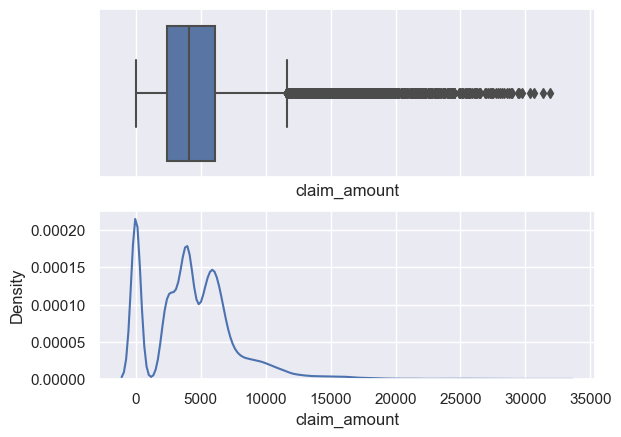

In [772]:
#Check the outliers in the claim amount, as we have seen that there are lot of outiers in the data.
sns.set(style="darkgrid")
fig,(ax_box,ax_dist)=plt.subplots(2,sharex=True)
sns.boxplot('claim_amount',data=df_train,ax=ax_box)
sns.distplot(df_test['claim_amount'],hist=False,ax=ax_dist)
plt.show()

# Remove outliers through quartile method and apply capping.

In [773]:
percentile25=df_test['claim_amount'].quantile(0.25)
percentile75=df_test['claim_amount'].quantile(0.75)

In [774]:
IQR=percentile75-percentile25

In [775]:
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR
print("Upper_limit:",upper_limit)
print("Lower_limit:",lower_limit)

Upper_limit: 11663.0
Lower_limit: -3161.0


In [776]:
df_test[df_test['claim_amount']>upper_limit]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
51,89444,Male,Urban,Bachelor,5L-10L,0,8,15190,1,A,Gold
146,89539,Female,Urban,High School,5L-10L,0,8,20102,More than 1,B,Silver
153,89546,Male,Urban,High School,5L-10L,0,8,13495,More than 1,A,Platinum
182,89575,Male,Urban,High School,5L-10L,0,5,12112,More than 1,A,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
59492,148885,Female,Urban,High School,5L-10L,1,6,12409,More than 1,B,Silver
59512,148905,Female,Urban,High School,5L-10L,1,8,14492,More than 1,A,Platinum
59535,148928,Male,Urban,High School,2L-5L,0,8,17238,More than 1,A,Gold
59539,148932,Male,Urban,High School,2L-5L,1,4,11699,More than 1,A,Platinum


In [777]:
df_test[df_test['claim_amount']<lower_limit]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy


In [778]:
df_test_cap=df_test.copy()

In [779]:
df_test_cap['claim_amount']=np.where(df_test_cap['claim_amount']>upper_limit,upper_limit,df_test_cap['claim_amount'])

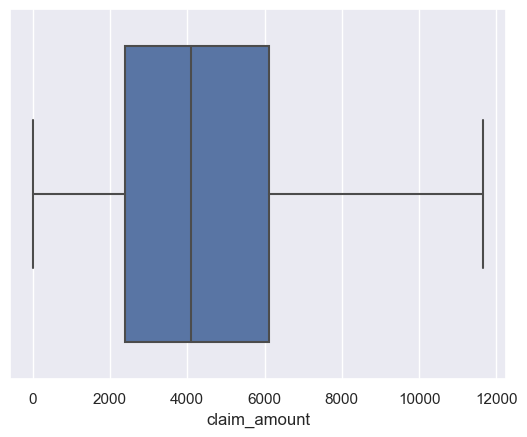

In [780]:
#After removal of outliers
sns.boxplot(df_test_cap['claim_amount'])
plt.show()

In [781]:
df_test_cap.drop(columns=['id'],inplace=True)

# Replace income features from new features

In [782]:
df_test_cap['income'] = df_test_cap['income'].replace('<=2L', 'low')

In [783]:
df_test_cap['income'] = df_test_cap['income'].replace('2L-5L', 'Medium')

In [784]:
df_test_cap['income'] = df_test_cap['income'].replace('5L-10L', 'High')

In [785]:
df_test_cap['income'] = df_test_cap['income'].replace('More than 10L', 'Very High')

In [786]:
df_test_cap.rename(columns={'income':'income_slab'},inplace=True)

# OHE or pd.get_dummies

In [787]:
df_test_cap=pd.get_dummies(df_test_cap,columns=['num_policies','policy','gender','qualification','area'],drop_first=True)

# Ordinal_encoding

In [788]:
enc=OrdinalEncoder(categories=[['low','Medium','High','Very High'],['Silver','Gold','Platinum']])

In [789]:
enc.fit(df_test_cap[['income_slab',"type_of_policy"]])

OrdinalEncoder(categories=[['low', 'Medium', 'High', 'Very High'],
                           ['Silver', 'Gold', 'Platinum']])

In [790]:
df_test_cap[['income_slab','type_of_policy']]=enc.transform(df_test_cap[['income_slab','type_of_policy']])

In [791]:
df_test_cap.head()

,income_slab,marital_status,vintage,claim_amount,type_of_policy,num_policies_More than 1,policy_B,policy_C,gender_Male,qualification_High School,qualification_Others,area_Urban
0,2.0,0,6,2134.0,0.0,1,1,0,0,1,0,0
1,1.0,0,4,4102.0,2.0,1,0,0,0,1,0,1
2,2.0,1,7,2925.0,1.0,1,1,0,1,1,0,0
3,3.0,1,2,0.0,0.0,1,1,0,0,0,0,0
4,1.0,0,5,11663.0,0.0,1,1,0,0,1,0,1


# Here we scale and transform the test data:

In [792]:
num_vars=['income_slab','vintage','claim_amount','type_of_policy']
df_test_cap[num_vars]=scaler.transform(df_test_cap[num_vars])

In [793]:
df_test_cap.head()

,income_slab,marital_status,vintage,claim_amount,type_of_policy,num_policies_More than 1,policy_B,policy_C,gender_Male,qualification_High School,qualification_Others,area_Urban
0,0.666667,0,0.750,0.183554,0.0,1,1,0,0,1,0,0
1,0.333333,0,0.500,0.352830,1.0,1,0,0,0,1,0,1
2,0.666667,1,0.875,0.251591,0.5,1,1,0,1,1,0,0
3,1.000000,1,0.250,0.000000,0.0,1,1,0,0,0,0,0
4,0.333333,0,0.625,1.003183,0.0,1,1,0,0,1,0,1


In [794]:
df_test_new = sm.add_constant(df_test_cap)

# Prediction on test data

In [795]:
y_test_pred = model1.predict(df_test_new)
y_test_pred

0        104222.816881
1        126747.832397
2        102792.549171
3         87663.577158
4        142121.383849
             ...      
59590     36011.501040
59591     58261.135152
59592    110009.139700
59593    115946.590489
59594    116358.475096
Length: 59595, dtype: float64

In [796]:
y_test_pred.to_csv("y_test_New",index=False)

# Final_Model_Summary

In [797]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:52:08   Log-Likelihood:            -1.1398e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89379   BIC:                         2.280e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 